In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

n_frames = 9859

In [2]:
f = open('dist_dmg.json', 'r')

data = json.load(f)
dist = [None] * len(data['obsels'])
p1_dmgs = [None] * len(data['obsels'])
p2_dmgs = [None] * len(data['obsels'])
p1_stocks = [None] * len(data['obsels'])
p2_stocks = [None] * len(data['obsels'])
for d in data['obsels']:
    dist[d['m:n'] - 1] = d['m:distance']
    p1_dmgs[d['m:n'] - 1] = d['m:p1_dmg']
    p2_dmgs[d['m:n'] - 1] = d['m:p2_dmg']
    p1_stocks[d['m:n'] - 1] = d['m:p1_stocks']
    p2_stocks[d['m:n'] - 1] = d['m:p2_stocks']
print(dist[:10])

[147456.0, 147456.0, 147456.0, 147456.0, 147456.0, 147456.0, 147456.0, 147456.0, 147456.0, 147456.0]


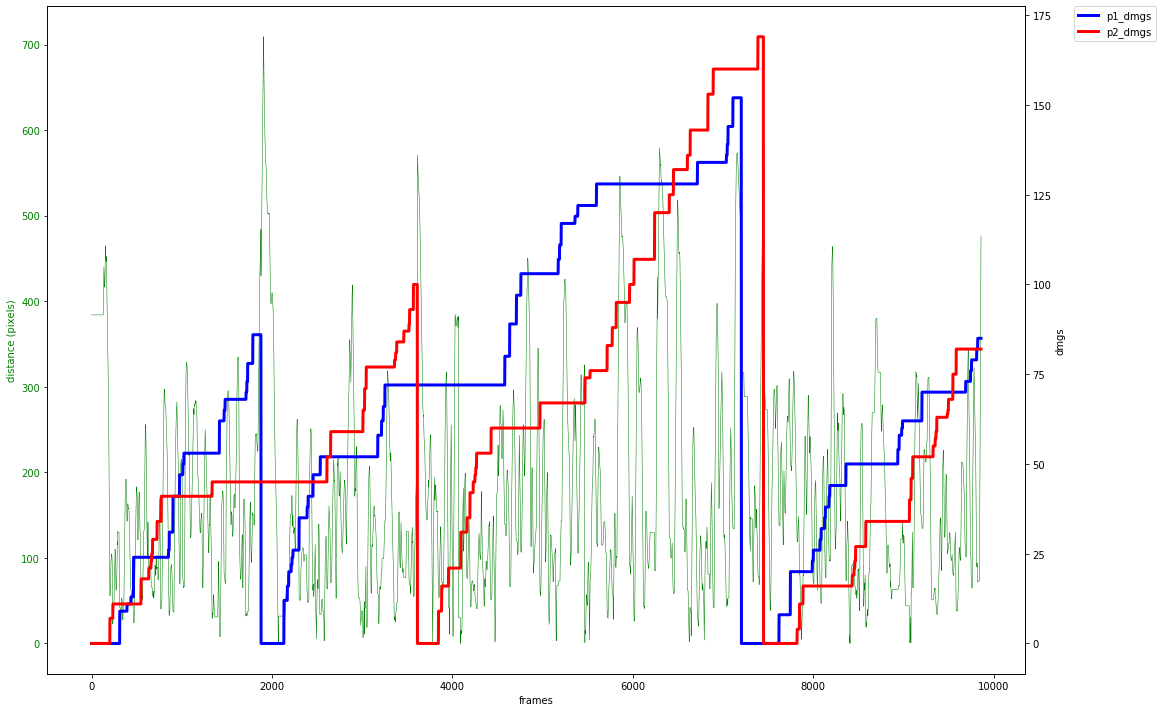

In [3]:
fig, ax1 = plt.subplots(figsize=(15, 10))

ax1.set_xlabel('frames')
ax1.set_ylabel('distance (pixels)', color='g')
ax1.plot(np.sqrt(dist), 'g', linewidth=.5)
ax1.tick_params(axis='y', labelcolor='g')

ax2 = ax1.twinx()

ax2.set_ylabel('dmgs')
ax2.plot(p1_dmgs, 'b', linewidth=3, label='p1_dmgs')
ax2.plot(p2_dmgs, 'r', linewidth=3, label='p2_dmgs')
ax2.tick_params(axis='y')

fig.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

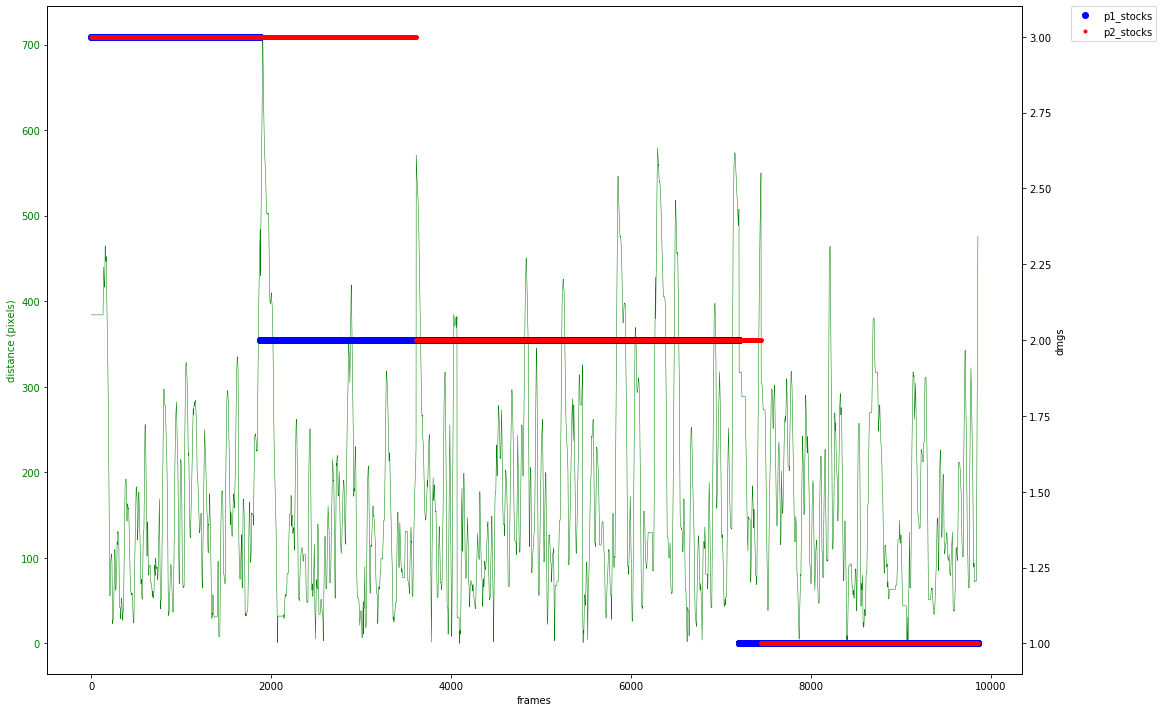

In [35]:
fig, ax1 = plt.subplots(figsize=(15, 10))

ax1.set_xlabel('frames')
ax1.set_ylabel('distance (pixels)', color='g')
ax1.plot(np.sqrt(dist), 'g', linewidth = .5)
ax1.tick_params(axis='y', labelcolor='g')

ax2 = ax1.twinx()

ax2.set_ylabel('dmgs')
ax2.plot(p1_stocks, 'bo', label='p1_stocks')
ax2.plot(p2_stocks, 'r.', label='p2_stocks')
ax2.tick_params(axis='y')

fig.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [13]:
f = open('states.json', 'r')

data_states = json.load(f)
p1_state_12 = [None] * n_frames
p2_state_12 = [None] * n_frames
for d in data_states['obsels']:
    p1_state_12[d['m:n'] - 1] = 1 if d['m:p1_state'] == 12 else None
    p2_state_12[d['m:n'] - 1] = .9 if d['m:p2_state'] == 12 else None
print(p1_state_12[:10])

[None, None, None, None, None, None, None, None, None, None]


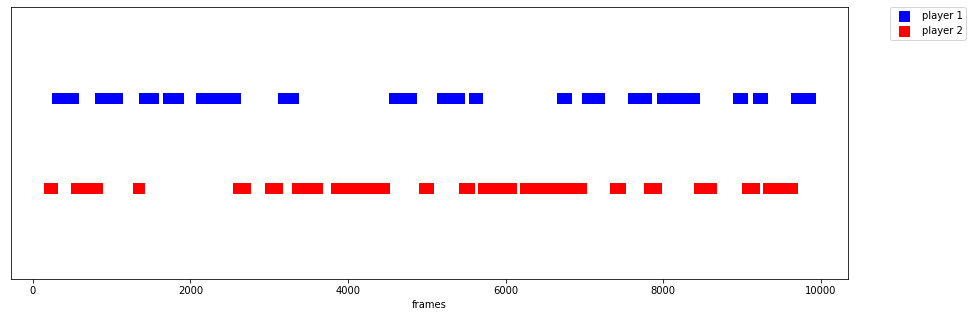

In [49]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.set_xlabel('frames')
ax.plot(p1_state_12, 'bs', markersize=10, label='player 1')
ax.plot(p2_state_12, 'rs', markersize=10, label='player 2')

ax.get_yaxis().set_visible(False)
plt.ylim(.8, 1.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()